<a href="https://colab.research.google.com/github/ruizfranco02/Proyecto_DS_CODER/blob/main/ProyectoDSParteI-Ruiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avance Proyecto Final de Data Science I

## Abstract

##### En la primera entrega de este proyecto analizaremos el rendimiento de los euqipos de la Liga Profesional de Futbol Argentino utilizado el dataset "afa_2015_2022_spa" basado en datos recopilados por la página PROMIEDOS. Las variables principales que rodean este dataset es el comportamiendo de los equipos locales y visitantes, teniendo consigo diferentes características con las que podemos crear las siguientes preguntas e hipotesis.
- 1) ¿Los equipos locales marcan más goles que los visitantes?
- 2) El valor del mercado tiene relación con los goles anotados
- 3) ¿Influyen las variables físicas en el rendimiento del equipo?

## Objetivo del proyecto

##### Desarrollar un análisis de la condición de local y visitante y que tan influyente es jugar un partido en tu estadio, así como tambien analizar que tan determinante invertir en el plantel y en las condiciones físicas de los jugadores para la mejoría del equipo.

In [9]:
# Carga de librerias correspondientes para leer y graficar el dataset.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Carga de dataset desde github

url = "https://raw.githubusercontent.com/ruizfranco02/Proyecto_DS_CODER/refs/heads/main/Datasets/afa_2015_2022_spa.csv"
df = pd.read_csv(url)
df.head()

,torneo,fecha,partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local,tiros_arco_local,intentos_local,...,proporcion_zurdos_local,valor_mercado_visitante,altura_media_visitante,edad_media_visitante,proporcion_zurdos_visitante,resultado,fecha_encuentro,apuesta_local,apuesta_visitante,apuesta_empate
0,Campeonato 2015,1,1,Velez,Aldosivi,2,0,NaN,NaN,NaN,...,0.301887,8.725,1.790370,28.100000,0.233333,L,2015-02-13 18:00:00,1.75,5.01,3.37
1,Campeonato 2015,1,2,Racing Club,Rosario Central,0,1,NaN,NaN,NaN,...,0.297297,18.350,1.789333,25.608696,0.217391,V,2015-02-13 21:10:00,1.80,4.82,3.23
2,Campeonato 2015,1,3,San Lorenzo,Colon,2,0,NaN,NaN,NaN,...,0.285714,12.125,1.801026,24.948718,0.282051,L,2015-02-14 17:00:00,1.70,5.55,3.34
3,Campeonato 2015,1,4,Gimnasia (LP),Def y Justicia,0,1,NaN,NaN,NaN,...,0.227273,12.050,1.776889,25.460000,0.240000,V,2015-02-14 17:00:00,2.06,3.82,3.09
4,Campeonato 2015,1,5,Godoy Cruz,San Martin (SJ),1,1,NaN,NaN,NaN,...,0.226415,11.250,1.780000,26.153846,0.205128,E,2015-02-14 19:15:00,2.03,3.82,3.15


In [11]:
#Buscamos los valores perdidos

missing = df.isna().sum().sort_values(ascending=False)
print(missing[missing > 0])

intentos_local            1325
tiros_arco_local          1325
tiro_esquina_visitante    1325
faltas_visitante          1325
posesion_local            1325
intentos_visitante        1325
tiros_arco_visitante      1325
posesion_visitante        1325
tiro_esquina_local        1325
faltas_local              1325
amarillas_local           1313
amarillas_visitante       1313
rojas_local               1140
rojas_visitante           1140
apuesta_visitante            3
apuesta_local                3
apuesta_empate               3
fecha_encuentro              3
dtype: int64


## Análisis Univariado.


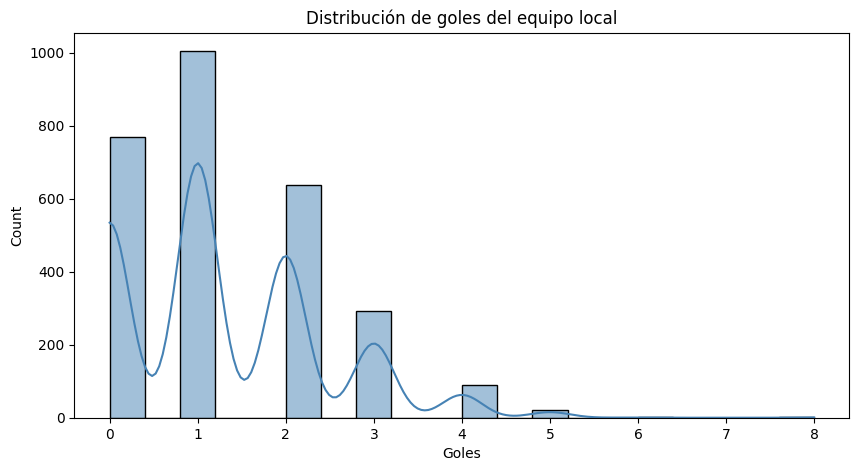

In [12]:
# Distribución de goles del equipo local

plt.figure(figsize=(10,5))
sns.histplot(df["goles_local"], bins=20, kde=True, color="steelblue")
plt.title("Distribución de goles del equipo local")
plt.xlabel("Goles")
plt.show()

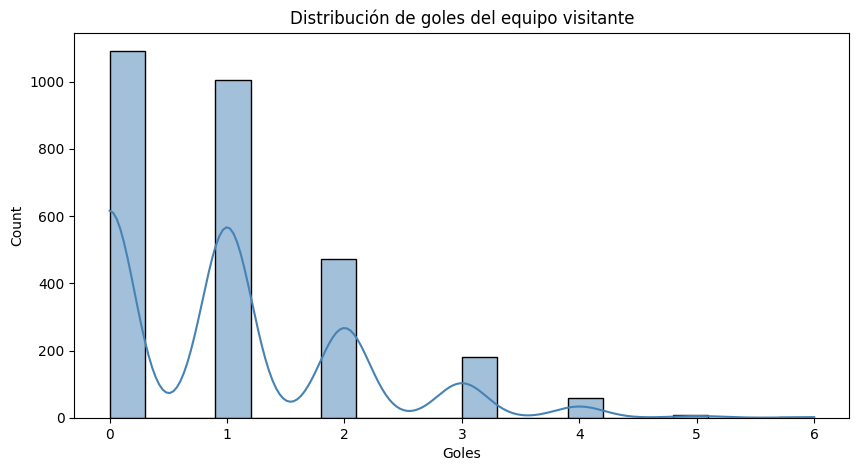

In [13]:
# Distribución de goles del equipo visitante.

plt.figure(figsize=(10,5))
sns.histplot(df["goles_visitante"], bins=20, kde=True, color="steelblue")
plt.title("Distribución de goles del equipo visitante")
plt.xlabel("Goles")
plt.show()

Con estos gráficos respondemos a la primer pregunta verificando que los equipos que juegan en condición de local marcan más goles que aquellos que juegan de visitante.

## Análisis bivariado.

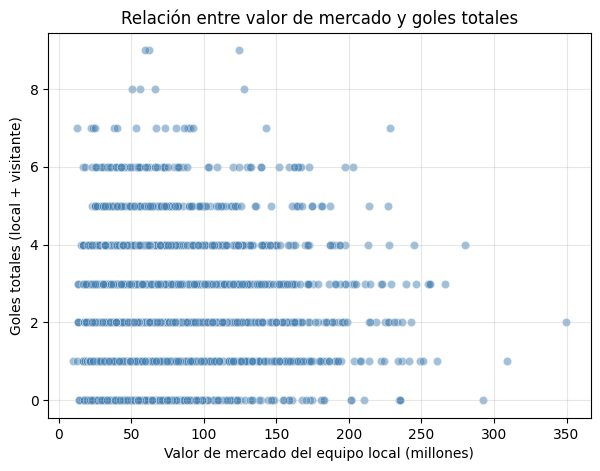

In [27]:
#Relación goles - valor del mercado.

df["goles_totales"]= df["goles_local"] + df ["goles_visitante"]
df["valor_del_mercado"] = df["valor_mercado_visitante"] + df["valor_mercado_local"]

plt.figure(figsize=(7,5))
sns.scatterplot( x="valor_del_mercado", y="goles_totales", data=df, alpha=0.5, color="steelblue")
plt.title("Relación entre valor de mercado y goles totales")
plt.xlabel("Valor de mercado del equipo local (millones)")
plt.ylabel("Goles totales (local + visitante)")
plt.grid(alpha=0.3)
plt.show()

## Análisis multivariado

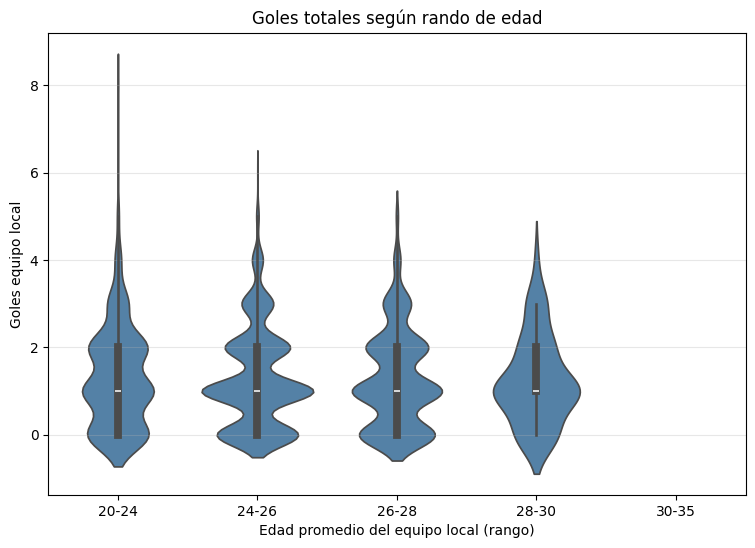

In [40]:
#Las caaracterísticas físicas (edad y altura) benefician al equipo

# Crear rangos de edad para el equipo local
df["edad_grupo"] = pd.cut(df["edad_media_local"], bins=[20, 24, 26, 28, 30, 35],
                    labels=["20-24", "24-26", "26-28", "28-30", "30-35"])

#Gráfico según la cantidad de goles del rango de edad
plt.figure(figsize=(9,6))
sns.violinplot(x="edad_grupo", y="goles_local", data=df, color ="steelblue", inner="box")
plt.title("Goles totales según rando de edad")
plt.xlabel("Edad promedio del equipo local (rango)")
plt.ylabel("Goles equipo local")
plt.grid(axis="y", alpha=0.3)
plt.show()

##Conclusiones preliminares.

##### La cantidad de goles de un equipo en el futbol argentino influye por factores externos como vemos en los gráficos la condición de local favorece al equipo e internos ya que el planted de jugadores influyen en su edad y condiciones físicas así también como la inversión que pone el club en el equipo invirtiendo el dinero correspondiente en ellos y permitiendo así también que ellos sean el futuro del club.